<a href="https://colab.research.google.com/github/jiruneko/nn/blob/main/nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

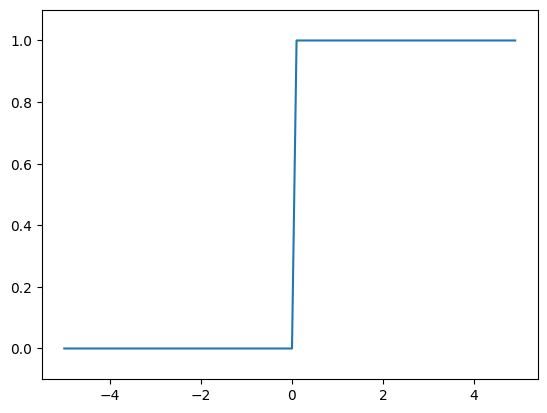

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

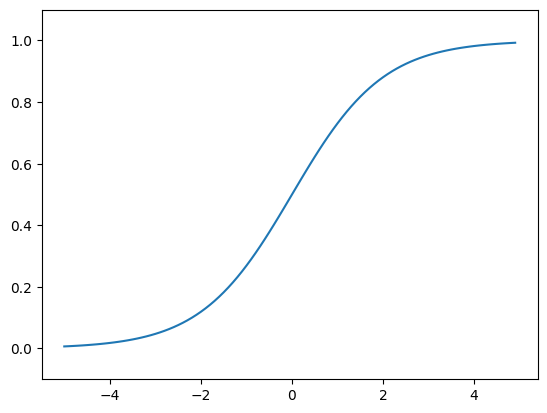

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

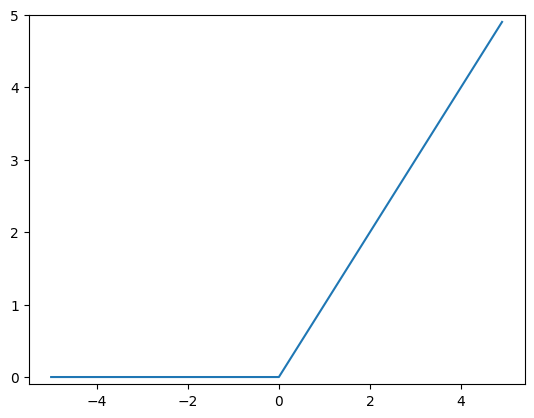

In [ ]:
def relu(x):
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 5.0)
plt.show()

# 多次元配列

In [ ]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [ ]:
np.ndim(A)

1

In [ ]:
A.shape

(4,)

In [ ]:
A.shape[0]

4

In [ ]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
np.ndim(B)

2

# ANN

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.17.0'

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

In [ ]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X

array([[ 0.99720391, -0.57873591, -0.57380915, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.00280393, -0.57873591,  1.74273971, ..., -1.54776799,
         0.97024255,  0.21653375],
       [ 0.99720391, -0.57873591, -0.57380915, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.99720391, -0.57873591, -0.57380915, ..., -1.54776799,
         0.97024255, -1.00864308],
       [-1.00280393,  1.72790383, -0.57380915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 0.99720391, -0.57873591, -0.57380915, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_test

array([[-1.00280393,  1.72790383, -0.57380915, ...,  0.64609167,
         0.97024255,  1.61304597],
       [ 0.99720391, -0.57873591, -0.57380915, ...,  0.64609167,
        -1.03067011,  0.49753166],
       [-1.00280393, -0.57873591,  1.74273971, ...,  0.64609167,
         0.97024255, -0.4235611 ],
       ...,
       [-1.00280393, -0.57873591,  1.74273971, ...,  0.64609167,
        -1.03067011,  0.72065149],
       [-1.00280393,  1.72790383, -0.57380915, ...,  0.64609167,
         0.97024255, -1.54438254],
       [-1.00280393,  1.72790383, -0.57380915, ...,  0.64609167,
        -1.03067011,  1.61474887]])

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6828 - loss: 0.6394
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7986 - loss: 0.4639
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 0.4413
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8099 - loss: 0.4328
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8032 - loss: 0.4323
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8186 - loss: 0.4136
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8184 - loss: 0.4206
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8233 - loss: 0.4098
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8203 - loss: 0.4120
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8159 - loss: 0.4164
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8208 - loss: 0.4121
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1507   88]
 [ 189  216]]


0.8615